Iteration:0          Cost:0.6931471806  Previous cost:inf         
Iteration:1          Cost:0.2746952932  Previous cost:0.6931471806
Iteration:2          Cost:0.1761049832  Previous cost:0.2746952932
Iteration:3          Cost:0.1301194681  Previous cost:0.1761049832
Iteration:4          Cost:0.109886917   Previous cost:0.1301194681
Iteration:5          Cost:0.1036657317  Previous cost:0.109886917 
Iteration:6          Cost:0.1028377002  Previous cost:0.1036657317
Iteration:7          Cost:0.1028175557  Previous cost:0.1028377002
Iteration:8          Cost:0.1028175405  Previous cost:0.1028175557
Total iterations:9  Final cost:0.1028175405 Total time:0.00451ms
Weight: [[-45.27234377]
 [  5.75453232]
 [ 10.44669989]]


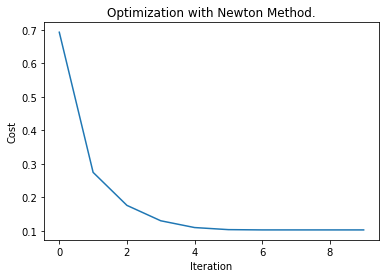

In [11]:
# theta here is weight.

# Import libraries
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Use iris data from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data[50:, 2:]
iris_target = iris.target[50:] - 1

x1 = iris_data[:,0]
x2 = iris_data[:,1]
w = np.random.rand(3)
c = iris_target

data = np.array([x1,x2,c]).T
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]


# Sigmoid function
def sigmoid(z):
    return(1. / (1. + np.exp(-z)))

# Log-likehood function
def CostFunction(X,y, theta):
    m = len(y)
    # sigmoid(wTx)
    h = sigmoid(np.dot(X, theta))
    j = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    return j

# Gradient of Cross Entropy 
def gradient(X, y, theta):
    y_hat = sigmoid(np.dot(X, theta))  
    return np.dot(X.T, (y_hat - y))

# Hessian of Cross Entropy 
def hessian(X,y,theta):
    y_hat = np.array(sigmoid(np.dot(X, theta)) )
    
    # Matrix R
    ds = y_hat*(1-y_hat)
    R = np.diag( ds.ravel() ) 
    
    # H = XT R X 
    H =  X.T.dot( R.dot(X)) 
    return H
                 
# Newton Method
def Newton_Method(X,y,theta, verbose=True):
    cost = CostFunction(X, y,theta)[0][0]
    cost_prev = np.inf
    history = [cost]
    timehis = []
    itera = 0
    time_all_start = time.time()
    while cost_prev - cost > .00000001:
        print(f"Iteration:{itera:<9}  Cost:{cost:<12.10}  Previous cost:{cost_prev:<12.10}")      
        cost_prev = cost
        start = time.time()
        grad = gradient(X,y,theta)
        H = hessian(X,y,theta)
        Hinv = np.linalg.inv(H)
        theta = theta - Hinv.dot(grad)
        elapsed = time.time() - start
        cost = CostFunction(X, y,theta)[0][0]
        timehis.append(elapsed)
        history.append(cost)
        itera += 1
    time_all = time.time() - time_all_start
    
    print(f"Total iterations:{itera:}  Final cost:{history[-1]:<.10} Total time:{time_all:<.3}ms" )
    return (itera, theta, history)
                       
initial_theta = np.zeros(X.shape[1])
theta = initial_theta.reshape(-1,1)
itera, theta, Cost_h = Newton_Method( X, y, theta)

print(f"Weight: {theta}") 
plt.figure()
plt.title("Optimization with Newton Method.")
plt.plot(range(itera+1), Cost_h)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()